<a href="https://colab.research.google.com/github/guifzy/conceitos_ml/blob/main/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Neste documento, irei demonstrar os principais algoritmos de aprendizagem supervisionada e algumas equa√ß√µes matematicas por tr√°s destes algoritimos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# KNN (K-Nearest Neighbors)

Busca os vizinhos mais pr√≥ximos de um determinado ponto para se basear em um resposta.


*   Pode ser usado em aprendizado supervisionado e n√£o supervisionado;
*   Pode ser usado em problemas de classifica√ß√£o bin√°rio(0, 1) e em problemas de regress√£o;



## Dist√¢ncia Euclidiana
Usa a ideia de dist√¢ncia euclidiana para calcular a menor dist√¢ncia entre um ponto e seus vizinhos.

Pode ser utilizada em $n$ dimens√µes.

$d(a, b)=‚àë^{n}_{i=1}(b_x - a_x)^2$
$$$$

$d(a,b)=\sqrt{(b_1 - a_1)^2 + (b_2 - a_2)^2 + ... + (b_x - a_x)^2}$


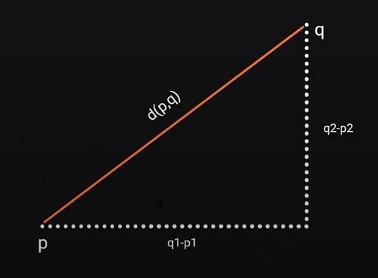

## Pesos

Al√©m do par√¢metro $K$, existem diferentes formas de escolher como ser√£o selecionados os vizinhos mais importantes.


*   **Uniforme**: Forma padr√£o, os vizinhos **n√£o possuem pesos** e a classe ou valor de previs√£o √© determinado pela maioria ou m√©dia simples dos vizinhos mais pr√≥ximos.
*   **Dist√¢ncia**: Os vizinhos com **menor dist√¢ncia** do ponto atual recebem um **peso maior** que vizinhos mais distantes.



In [ ]:
points = {
    "blue" : [[2, 4], [1, 3], [3, 2], [2, 3], [2, 1]],
    "red" : [[5, 6], [4, 5], [4, 6], [6, 6], [5, 4], [7, 10]]
}

new_pint = [3, 3]

In [ ]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
class KNearestNeighbors:
  def __init__(self, k = 3):
    self.k = k
    self.point = None

  def fit(self, points):
    self.points = points # entrega o conjunto de dados, no caso de knn, o proprio
                         # conjunto de dados √© o treinamento por si s√≥

  def predict(self, new_point):
    distances = [] #lista com as distancias
    for category in self.points: # percorre as cores e em seguida os pontios em cada cor
      for point in self.points[category]:
        distances.append((euclidean_distance(point, new_point), category)) # armazena a tupla dentro da lista contendo o
                                                                    # valor da distancia eu clidiana e a cor do ponto

    distances.sort() # ordena da menor distancia para a maior
    k_nearest = [i[1] for i in distances[:self.k]] # pega os k pontos mais proximos
    # i[1] extrai o segundo elemento de cada tupla
    result = Counter(k_nearest).most_common(1)[0][0] # pega a cor mais comum

    return result

In [ ]:
kneighbor = KNearestNeighbors(k = 3)
kneighbor.fit(points)
kneighbor.predict(new_pint)

'blue'

# M√©tricas Para Classifica√ß√£o e Matrix de Confus√£o

A matriz de confus√£o √© uma ferramenta fundamental para avaliar a performance de modelos de classifica√ß√£o, como o K-Nearest Neighbors (KNN). Ela ajuda a entender como o modelo est√° se saindo em termos de predi√ß√µes corretas e incorretas para cada classe. A partir da matriz de confus√£o, podemos calcular v√°rias m√©tricas de performance.

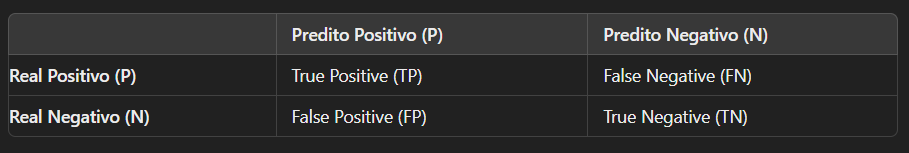

- **Accuracy:** medida geral de quantas predi√ß√µes o modelo acertou;
- **Precision:** propor√ß√£o de predi√ß√µes positivas corretas entre todas as predi√ß√µes consideradas positivas pelo modelo.
- **Recall:** propor√ß√£o de veradeiros positivos corretamente previstos entre somente as realmente positivas;
- **F1-Score:** m√©dia entre accuracy e recall.

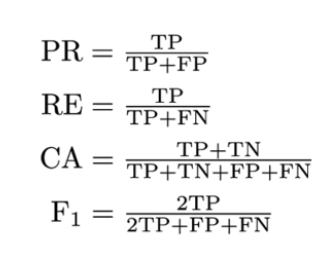

# Bias, Variance e TradeOff

- **Bias:** Refere-se √† tend√™ncia de um modelo de fazer previs√µes sistematicamente incorretas, ou seja, erros consistentes em uma dire√ß√£o espec√≠fica. Por exemplo, uma **reta de regress√£o linear** nunca conseguira criar uma **curva** para entender **perfeitamente a rela√ß√£o entre as variaveis**.
  - Quanto maior for o Bias, menos o modelo consegue criar uma rela√ß√£o entre variaveis, **Underfitting**.

- **Variance:** Refere-se √† sensibilidade do modelo √†s pequenas varia√ß√µes nos dados de treinamento. Um modelo com alta vari√¢ncia se **ajusta muito bem** aos dados de treinamento, capturando at√© mesmo o ru√≠do presente nos dados, mas **pode falhar** em generalizar para **novos dados**.
  - Quanto mais o modelo de ajusta aos dados, maior a variancia, o que pode causar um problema de **Overfitting**.

##TradeOff

O tradeoff entre bias e variance refere-se ao dilema enfrentado ao tentar minimizar o erro total de um modelo. Um modelo muito simples (com alto bias) pode n√£o capturar a complexidade dos dados, resultando em subajuste (underfitting). Por outro lado, um modelo muito complexo (com alta vari√¢ncia) pode se ajustar demais aos dados de treinamento, resultando em sobreajuste (overfitting).

# Fun√ß√£o de Custo e Fun√ß√£o de Perda

- **Fun√ß√£o de Perda:** A fun√ß√£o de perda mede o erro de uma √∫nica amostra de treinamento. Ela calcula a diferen√ßa entre o valor previsto pelo modelo e o valor real para essa amostra espec√≠fica.
- **Fun√ß√£o de Custo:** A fun√ß√£o de custo √© a m√©dia (ou soma) das perdas em todas as amostras de um conjunto de dados. Ela fornece uma medida agregada do erro do modelo em rela√ß√£o a todo o conjunto de dados.

# Converg√™ncia

Em machine learning o algoritmo **converge**, quando os par√¢metros da **fun√ß√£o de perda**, mudam muito **pouco** o valor da **fun√ß√£o de custo**, de forma a ser insignificante.

Com isso temos hiperpar√¢metros como o **crit√©rio de parda**, que define quando o algoritmo deve **parar**. Por exemplo, se ap√≥s 200 itera√ß√µes a fun√ß√£o de custo n√£o diminuir mais do que a toler√¢ncia especificada, o algoritmo para.

# Scikit-learn

*OBS: A partir de agora por se tratarem de calculos mais extensos utilizarei a biblioteca scikit-learn para importa√ß√£o do modelo.*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, classification_report

# Regress√£o Linear


Tecninca para encontrar a **rela√ßao(linha)** entre os valores de $X$ e $y$ que se da pela formula:
$$y = Œ≤_0 + Œ≤_1x$$

Caso existam mais de um valor de $X$:

$$y =‚àë^{n}_{i=1} (Œ≤_0{_i} + Œ≤_1{_i}x_i)$$

*   $Œ≤_1$ = Coeficiente angular, representa a mudan√ßa esperada em
$y$ para uma mudan√ßa unit√°ria em $x$.
*   $Œ≤_0$ = Intercep√ß√£o, representa o valor de $y$ quando $x$ √© zero.


*NOTA: para mais detalhes, pesquisar a formula de $a$ e $b$*

In [ ]:
# trazendo o dataframe
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
X = df_iris.drop("target", axis=1).values
y = df_iris["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
print(f"Valor predito: {pred}")
print(f"Valor real: {y_test}")

Valor predito: [ 1.24069097 -0.04537609  2.24501083  1.35143666  1.29775083  0.01024241
  1.05031173  1.82525399  1.37084413  1.06699186  1.70363485 -0.08712067
 -0.165166   -0.07724353 -0.03380619  1.40167699  2.00651252  1.04725931
  1.28368327  1.97600474  0.01782354  1.59952875  0.079732    1.92307532
  1.8621986   1.8790815   1.80251247  2.04196713  0.01873817  0.01291496
 -0.15365607 -0.08046738  1.18506728 -0.00461982 -0.02934265  1.68665136
  1.29088786 -0.07995434 -0.09076782 -0.16795331  1.75520461  1.37514144
  1.3174234  -0.07193336 -0.1131512 ]
Valor real: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


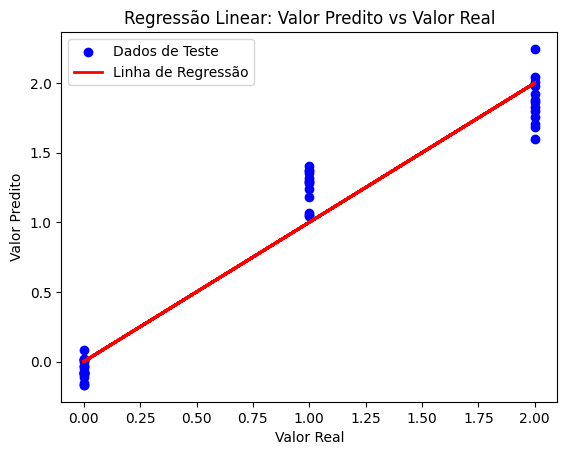

In [ ]:
plt.scatter(y_test, pred, color="blue", label="Dados de Teste")
plt.plot(y_test, y_test, color="red", linestyle='-', linewidth=2, label="Linha de Regress√£o")
plt.legend()
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Regress√£o Linear: Valor Predito vs Valor Real")
plt.show()

## Fun√ß√£o de Perda

De forma simples, √© calculo do valor ideal do coeficiente angular e da intecep√ß√£o, visando o menor n√∫mero da dist√ßancia entre o valor real e o valor previsto.

Estes par√¢metros s√£o internamente otimizados ao utilizar a fun√ß√£o:

```
fit()
```

Note que estes valores podem ser calculados a m√£o seguindo a formula de $a$ e $b$.

### RSS

Representa a fun√ß√£o de perda, contendo a soma dos quadrados das diferen√ßas entre os valores preditos pelo modelo e os valores reais de cada amostra nos dados de treinamento.

$‚àë(y-\overline{y})^2$

In [ ]:
RSS = np.sum((y_test - pred) ** 2)
print("Distancia entre valores reais e previstos:")
print(f"RSS = {RSS}")

Distancia entre valores reais e previstos:
RSS = 1.7399660570216058


#### Ordinary Least Squares (OLS)

 √â um m√©todo de estimativa utilizado para encontrar os melhores par√¢metros de um modelo de regress√£o linear. Ele busca minimizar a soma dos quadrados dos res√≠duos (RSS).

## Fun√ß√£o de Custo

### $R$ e $R^2$

Explica√ß√£o do modelo, ou seja, o quanto as $features$ podem explicar a previs√£o de uma valor($y$).


*   Variam de 0-1, onde 1 seria a explia√ß√£o total de $X$ para $y$.
*   $R^2$ √© a simplifica√ß√£o da explia√ß√£o do modelo.
$$R = \frac{n*‚àë{(xy)}-‚àëx*‚àëy}{\sqrt{[n*‚àë(x^2)-‚àë(x)^2][n*‚àë(y^2)-‚àë(y)^2]}}$$
$$$$
$$R^2=\sqrt{r}$$



In [ ]:
r_squared = reg.score(X_test, y_test)
print("R^2: {}".format(r_squared*100), "%")

R^2: 94.42318571467435 %


### RMSE

 Indica a m√©dia das dist√¢ncias entre os valores preditos e os valores reais, fornecendo uma medida de qu√£o bem o modelo est√° realizando suas previs√µes.
 $$RMSE=\sqrt{\frac1n‚àë(y-\overline{y})^2}$$


*   Se calcula a distancia do erro, $y$(valor real) e $\overline{y}$(valor predito), $(y-\overline{y})^2$;
*   Em seguida calcula a media dos erros, $\frac1n‚àë(y-\overline{y})^2$;
*   Por fim, $\sqrt{RMSE}$.



In [ ]:
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE: {}".format(rmse))

RMSE: 0.19663649808277686


# Hiperpar√¢metros para Regress√£o

De forma simples, s√£o par√¢metros ajustados antes da aprendizagemd do modelo, como por explo o numero de arvores aleat√≥rias, n√∫mero de camadas ocultas em uma rede neural ou quantos folds a serem usados para valida√ß√£o cruzada.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Valida√ß√£o Cruzada

Permite dividir o conjunto de dados em varias partes, simulando v√°rias divis√µes dos dados em conjuntos de treinamento e teste. Isso √© especialmente importante para garantir que o modelo n√£o apenas se ajuste bem aos dados de treinamento, mas tamb√©m generalize bem para novos dados.

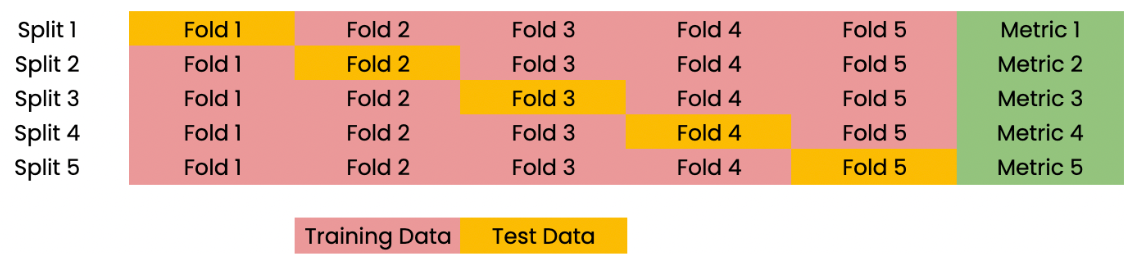

Essas divis√µes s√ßao chamas de Folds e geralmente s√£o divididas em:


*   5-Fold
*   10-Fold
*   k-Folds

Quanto maiores as divis√µes, **maior o custo computacional**.

Os valores obtidos pelo treinamento s√£o dados em $R^2$, metrica padr√£o para regress√£o linear.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf)
cv_scores

array([0.8839877 , 0.94437873, 0.92931205, 0.90851071, 0.94612808])

In [ ]:
print(f"Valor medio R^2: {np.mean(cv_scores)}")
print(f"Desvio padrao R^2: {np.std(cv_scores)}")
print(f"Intervalo de 95% de confian√ßa:{np.quantile(cv_scores, [0.025, 0.975])}")

Valor medio R^2: 0.9224634569172256
Desvio padrao R^2: 0.02350429716310196
Intervalo de 95% de confian√ßa:[0.88644    0.94595315]


## Regress√£o Regularizada

√â uma t√©cninca que visa impedir o overfitting ao adicionar uma penalidade na fun√ß√£o de perda que o programa est√° tentando minimizar.

### Lasso

- Adiciona uma penalidade($Œ±$) nos valores absolutos dos pesos da equa√ß√£o de regress√£o, $Œ≤_0$ e $Œ≤_1$.

- Coeficientes menos relevantes podem ser reduzidos a 0, removendo essas variaveis do programa, produzindo programas com menos par√¢metros.

$$Loss = ‚àë^{n}_{i=1}(y_i-\overline{y}_i)^2 + Œ±‚àë^{p}_{j=1}|Œ≤_j|$$

Onde $p$ √© a quantidade fatores da variavel $X$.

In [ ]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)

Lasso(alpha=0.3)

In [ ]:
print("R^2: {}".format(lasso.score(X_test, y_test)*100), "%")

R^2: 86.43544206702816 %


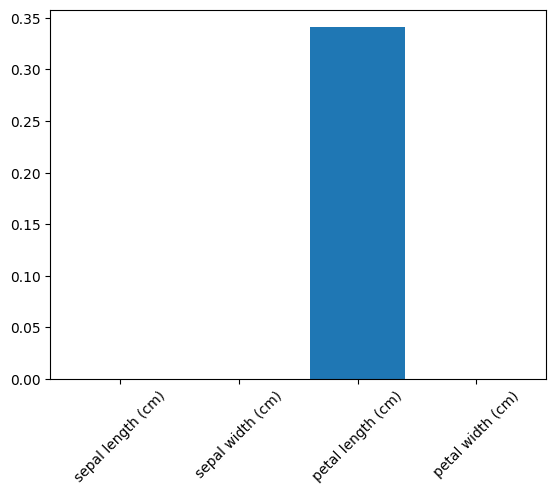

In [ ]:
lasso_coef = lasso.coef_
names = df_iris.drop("target", axis=1).columns
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

*Como podemos ver, os coeficientes menos relevantes foram reduzidos a zero.*

### Ridge

- A diferen√ßa deste modelo para o Lasso, √© que este aplica a penalidade em cima do quadrado dos valores dos coeficientes dos par√¢metros do modelo. Ou seja, as variaveiz n√£o s√£o eliminadas por completo, mas sim minimizadas

- Os pesos s√£o mais destribuidos entre os coeficientes, evitando que eles se tornem exessivamente grandes.

$$Loss = ‚àë^{n}_{i=1}(y_i-\overline{y}_i)^2 + Œ±‚àë^{p}_{j=1}Œ≤_j^2$$

In [ ]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [ ]:
print("R^2: {}".format(ridge.score(X_test, y_test)*100), "%")

R^2: 94.34779903118351 %


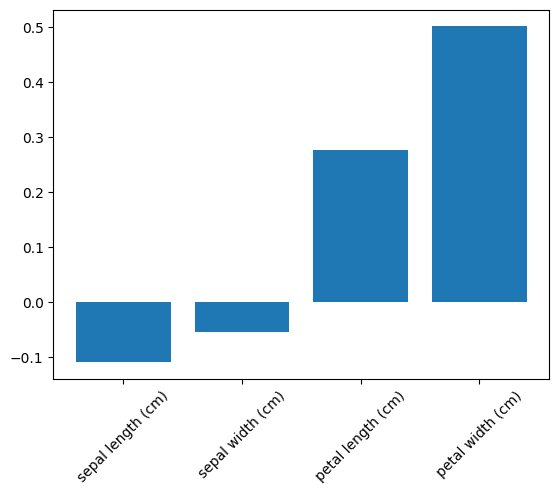

In [ ]:
ridge_coef = ridge.coef_
names_l2 = df_iris.drop("target", axis=1).columns
plt.bar(names_l2, ridge_coef)
plt.xticks(rotation=45)
plt.show()

*Como podemso ver os pesos foram distribuidos evitando um parametro de ficar exessivamente grande.*

### Solver

Um **hiperpar√¢metro** usado para escolher a **melhor fun√ß√£o de perda** para os algoritmos de **Regress√£o Regularizada**.


Os solvers dispon√≠veis para **Ridge** Regression em scikit-learn incluem:

- **auto**: Seleciona automaticamente o solver mais adequado.
- **svd**: Decomposi√ß√£o de valores singulares.
- **cholesky**: Decomposi√ß√£o de Cholesky.
- **lsqr**: M√©todo dos m√≠nimos quadrados.
- **sparse_cg**: Gradiente conjugado.
- **sag:** Gradiente estoc√°stico.
- **saga**: Extens√£o do sag que suporta penaliza√ß√£o L1.

Os solvers dispon√≠veis para **Lasso** Regression em scikit-learn incluem:

- **auto**: Seleciona automaticamente o solver mais adequado.
- **lsqr**: M√©todo dos m√≠nimos quadrados.
- **sparse_cg**: Gradiente conjugado.
- **sag**: Gradiente estoc√°stico.
- **saga**: Extens√£o do sag que suporta penaliza√ß√£o L1.

# Regress√£o Log√≠stica

Usaado para problemas de calssifia√ß√£o onde procuramos a probabilidade de um evento acontecer, ou n√£o $h(X)‚àà[0,1]$.


Para isso usamos Maximum Likelihood:
*   Procura-se encontrar a probabilidade de $\overline{X}$ ser o mais pr√≥ximo possivel de 1, $h(X)$;
*   Procura-se encontrar a probabilidade de $\overline{X}$ ser o mais pr√≥ximo possivel de 0, $1-h(X)$;



## Fun√ß√£o Sigmoide

Para fazer isto, convertemos os valores a serem previstos em probabilidade que variam de 0, negativo verdadeiro, e 1, positivo verdadeiro com o que chamamos de fun√ß√£o sigmoide.
$$\frac{1}{1+ùëí^{z}}=œÉ(z)$$
$$z = Œ≤_0 + Wx$$

- Esta √© a combina√ß√£o linear dos pesos ($W$) e as entradas (ùë•), com um termo de bias $Œ≤$.


$$h(x)=œÉ(Œ≤_0 + Wx)$$

O resultado da minha fun√ß√£o de ativa√ß√£o $h(x)$ √© a probabilidade do meu evento


A **fun√ß√£o sigmoide** na regress√£o logistica, transforma os valores previstos pela **formula padr√£o da regress√£o** em **probabilidades**, o que enfim se tornam outputs da nossa fun√ß√£o de ativa√ß√£o.

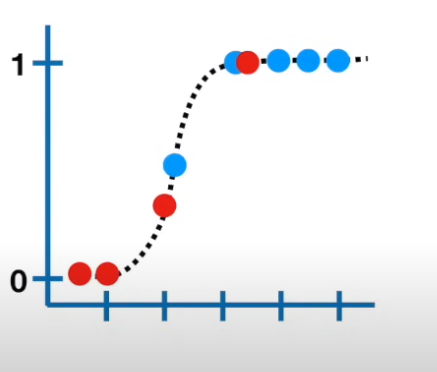

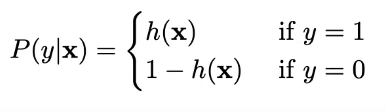

Para $h(x)=a$:
$$P(y|X)=a^y(1-a)^{1-y}$$

*Equa√ß√£o que comporta as duas hip√≥teses de $y$.*

## Fun√ß√£o de Perda

Assim como na regress√£o linear, essa fun√ß√£o calcula a dist√¢ncia entre os pontos previstos e os valores reais, buscando os valores √≥timos para os par√¢metros de entrada($Œ≤$ e $W$).

Para calcular este problmea √© usada a fun√ß√£o logaritmica: $Log_{a}(x)$ ou $ln(x)$, pois a fun√ß√£o tem comportamento de curva inversa a fun√ß√£o exponencial, torando assim possivel punir valores pr√≥ximos de 0 quando o resultado desejado for 1 e vice-versa.

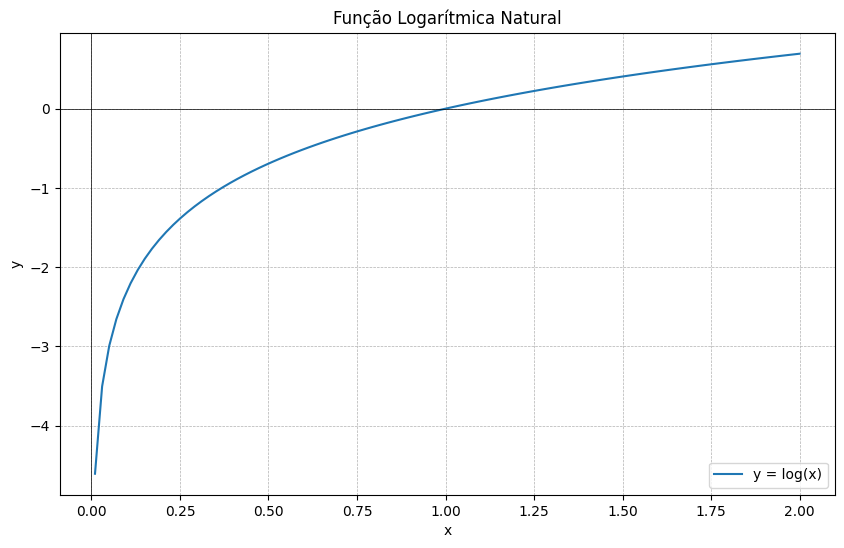

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 2, 100)  # evita x = 0 porque log(0) √© indefinido
y = np.log(x)  # f(x) para logaritmo natural

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='y = log(x)')
plt.title('Fun√ß√£o Logar√≠tmica Natural')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

A fun√ß√£o de perda se baseia em log-loss, que basicamente aplica uma fun√ß√£o logaritmica ao resultado previsto.
$$
J(\mathbf{w}, b) = - \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$


- $i$ representa a en√©sima amostra;
-  $y^{(i)} \log(\hat{y}^{(i)})$, mede a dist√¢ncia entre o valor real($y$) para $y=1$ e o valor previsto($\log(\hat{y})$)
-  $(1 - y) \log(1 - \hat{y}^{(i)})$, mede a dist√¢ncia entre o valor real($1-y$) para $y=0$ e o valor previsto($\log(1-\hat{y})$)

>Ap√≥s isso, √© calculada a m√©dia de todas os resultados para fun√ß√£o de perda, o que chamamos de **FUN√á√ÇO DE CUSTO**:
$$
J0=\frac{1}{m} \sum_{i=1}^{m}J(\mathbf{w}, b)
$$

Ap√≥s a avalia√ß√£o da fun√ß√£o de custo, com os melhores par√¢metros para a fun√ß√£o linear, √© estabelecido um limiar para defini√ß√£o da classe.

Para determinar qual ser√° a label prevista de um novo valor, √© tra√ßado um limiar(Threshold) de normalmente 0,5.


*   Se $p(y|X)‚â•0.5$, a previs√£o √© a classe 1.

*   Se $p(y|X)<0.5$, a previs√£o √© a classe 0.



Com isso, √© montada uma matriz de confuns√£o a partir dos dados classificados e os valores de $y$.

In [ ]:
# Importando bibliotecas necess√°rias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Gerando um conjunto de dados fict√≠cio
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 amostras, 2 caracter√≠sticas
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Classe 1 se a soma das caracter√≠sticas for > 1, caso contr√°rio, classe 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regress√£o log√≠stica
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previs√µes no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
probabilidades = model.predict_proba(X_test)

print(f"Probabilidades previstas: {probabilidades}")
print(f"Acur√°cia: {accuracy:.2f}")
print("Relat√≥rio de Classifica√ß√£o:")
print(report)

Probabilidades previstas: [[0.80359493 0.19640507]
 [0.35299679 0.64700321]
 [0.35267135 0.64732865]
 [0.42349939 0.57650061]
 [0.14650232 0.85349768]
 [0.82846533 0.17153467]
 [0.2492416  0.7507584 ]
 [0.39019439 0.60980561]
 [0.09677078 0.90322922]
 [0.27168769 0.72831231]
 [0.309969   0.690031  ]
 [0.87116824 0.12883176]
 [0.34093348 0.65906652]
 [0.61445826 0.38554174]
 [0.54766089 0.45233911]
 [0.30759792 0.69240208]
 [0.55377805 0.44622195]
 [0.38379325 0.61620675]
 [0.55825097 0.44174903]
 [0.66804722 0.33195278]]
Acur√°cia: 0.90
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## Solver

Adiciona **penalidades** como **Lasso, Ridge ou ambos** em um algoritmo de Regress√£o Logistica.

Os solvers dispon√≠veis para Regress√£o Log√≠stica em scikit-learn incluem:

- **liblinear**: Bom para pequenos datasets e suporta penaliza√ß√£o L1 e L2.
- **newton-cg**: Bom para grandes datasets e suporta apenas penaliza√ß√£o L2.
- **lbfgs**: Bom para grandes datasets e suporta apenas penaliza√ß√£o L2.
- **sag**: Gradiente estoc√°stico, bom para grandes datasets e suporta apenas penaliza√ß√£o L2.
- **saga**: Extens√£o do sag que suporta penaliza√ß√£o L1, L2, e Elastic Net.

### Regulariza√ß√£o

Na regress√£o logistica o **valor de alpha** para controlar a penalidade √© feita de uma forma deiferente, e o chamamos de **Regulariza√ß√£o Inversa**.

- C alto (baixa regulariza√ß√£o): O modelo se ajusta mais aos dados de treinamento, permitindo coeficientes maiores, o que pode levar ao overfitting.
- C baixo (alta regulariza√ß√£o): O modelo penaliza coeficientes grandes, tornando-os menores e simplificando o modelo, o que pode levar ao underfitting.

# ROC e AUC

Para saber o valor ideal de **Threshold** para a melhor performance do nosso modelo de classifica√ß√£o, fazemos testes com matrizes de confus√£o, a fim de descobrir a melhor taxa de **Verdadeiro Positivos(TP) e Falsos Positivos(FP).**

Para n√£o ser nescess√°rios fazer o calculo atravez de cada uma destas matrizes, usaos **ROC**.

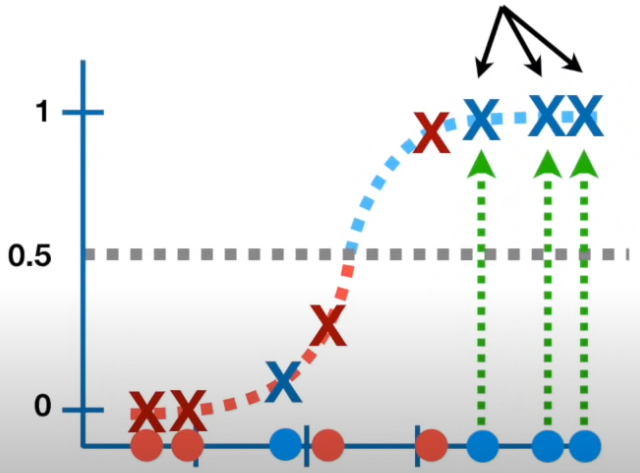

De acordo com o valor de Threshold, √© feito o c√°lculo das taxas de precis√£o:
$$TPR= \frac{TP}{TP-FN}$$
$$FPR= \frac{FP}{FP-TN}$$

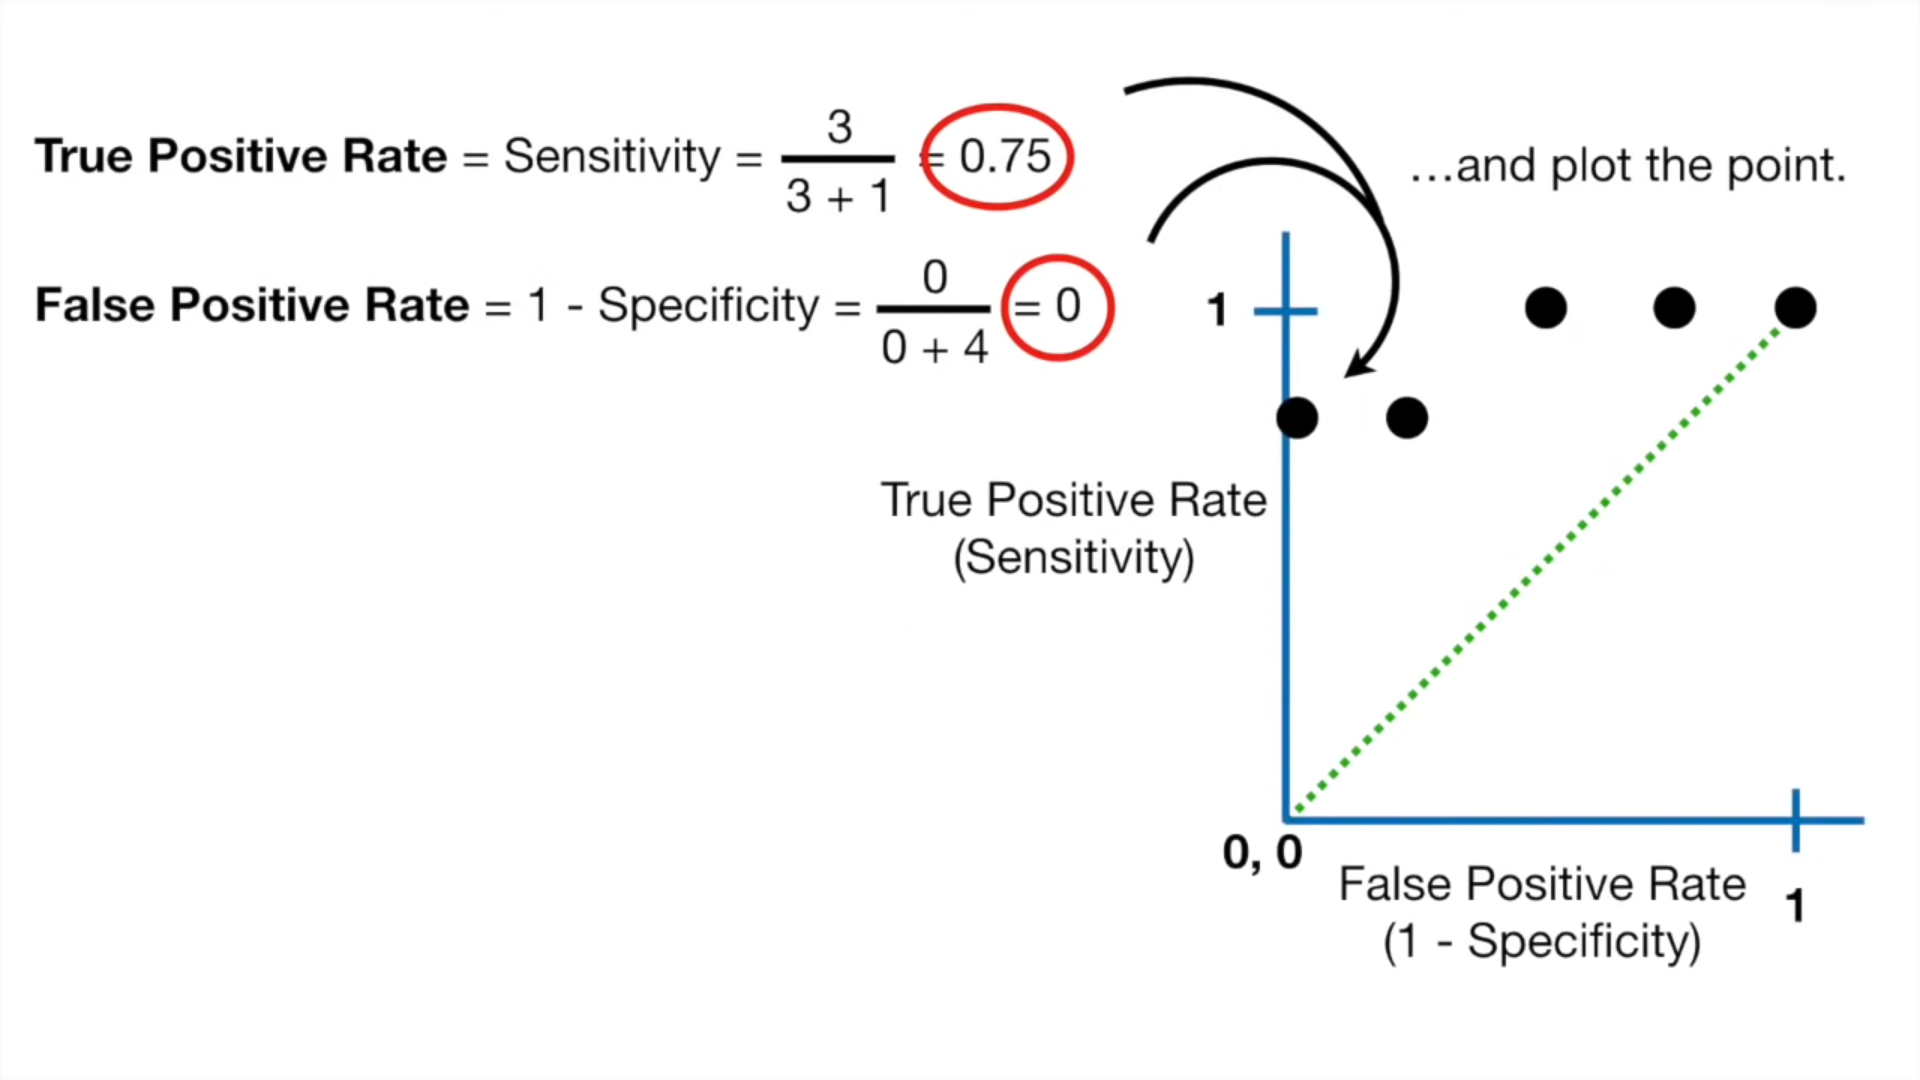

A rela√ß√£o dos pontos na curva ROC se da pelo seguinte:
- Pontos **reais($y$)**, s√£o posicionados no gr√°fico para serem a **base** da determina√ß√£o de **TPR e FPR**
- Os pontos **previstos($\overline{y}$)**, s√£o classificados no gr√°fico **a partir** dos **pontos reais** e tamb√©m calculam um valor de **TPR e FPR**.
- Os valores de trashold, s√£o adicionados no mapa e a partir dessa linha √© feito os calculos com base na **matrix de confus√£o**, em seguida s√£o comparados os valores de $y$ e $\overline{y}$

## AUC

Representa a **√°rea da curva ROC**, quanto mais pr√≥ximo seu valor for de **1**, mais seus resultados foram relevantes em rela√ß√£o as Taxas de **FP e TP**, logo o modelo tem uma melhor performance.

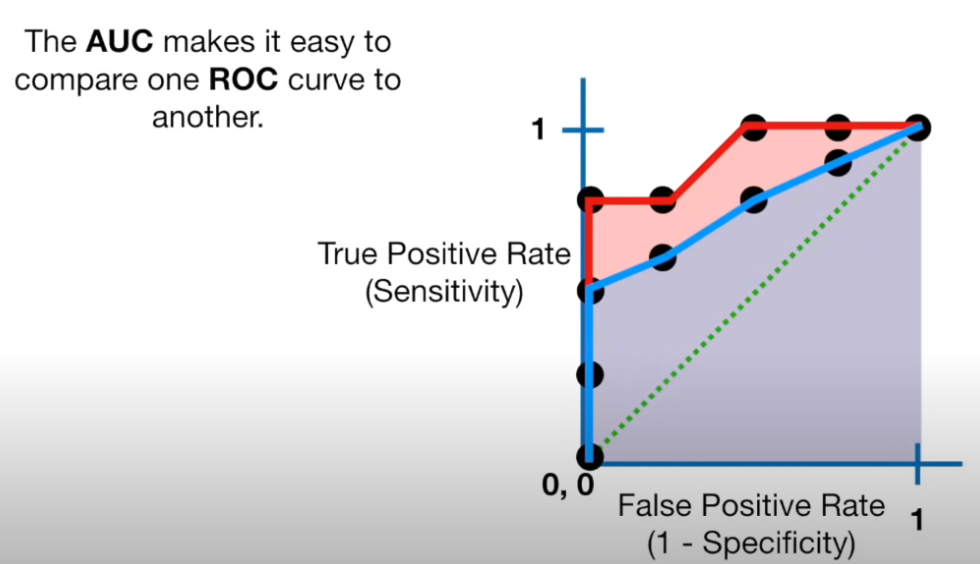

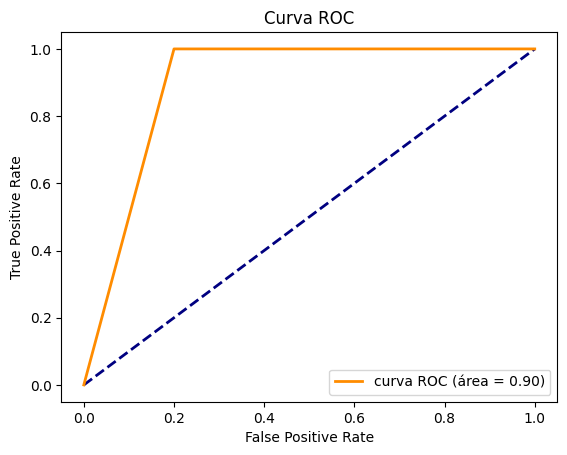

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# armazena os valores de metricas retornados pela fun√ß√£o.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# armazena a √°rea sob curva
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC (√°rea = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Suport Vector Classifier

De uma forma simples, SVM √© um vetor de dados onde √© feita uma classifia√ß√£o entre estes para determinar qual grupo este dado √© pertencente.

Para isso, √© determinado um **trashold**, que determina em qual ponto este dado √© classificado.

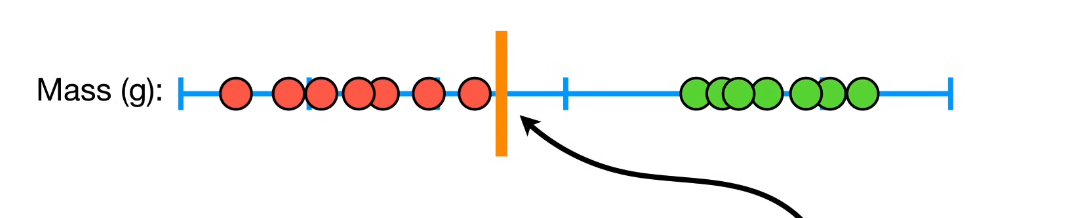

Para determinar um valor ideal para o Trashold, √© calculado a distancia entre os pontos mais proximos dos diferentes grupos, e a partir disso temos um valor ideal de Trashold chamado **margem**.

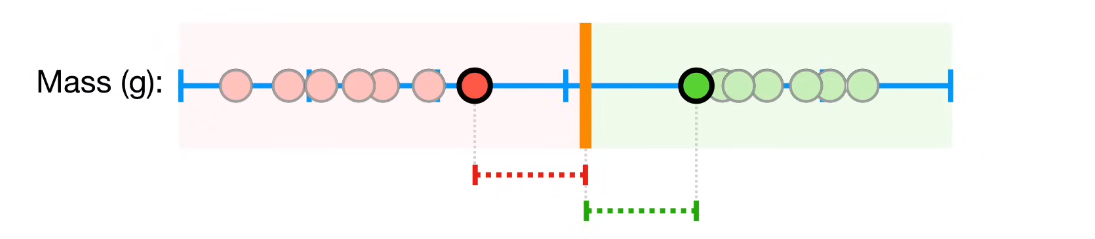

## Soft Margin Classifier

Para evitar o **overfitting**, permitimos a classifica√ß√£o errada de pontos para garantir que novos pontos ser√£o classificados corretamente.

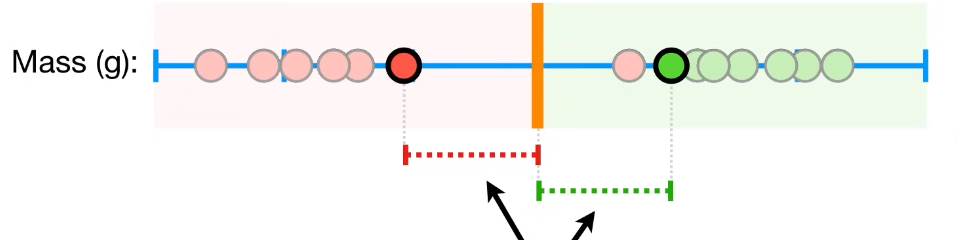

*OBS: Para determinar qual o melhor ponto para se medir a distancia e definar a margem, usamos CrossValidadion entre todos os dados de treino.*

# SVM

Para classificar dados com dispers√µes muito distintas usando Suport Vector Classifier, usamos uma tecninca para aumentar a dimensionalidade dos dados.
$$y = X^2$$

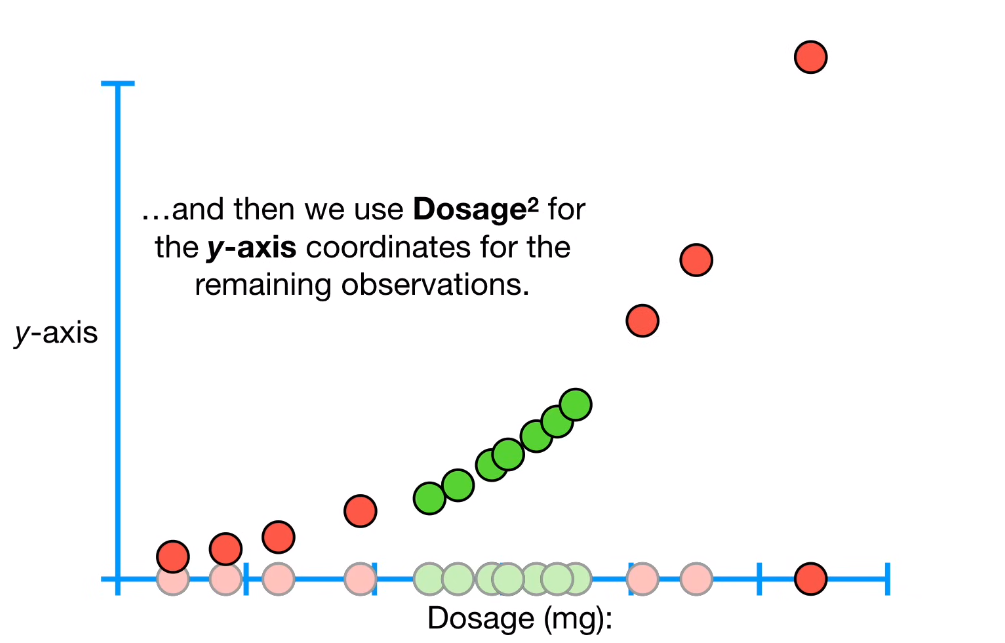

*Chamamos isso de fun√ß√£o Kernel, conseguindo separar dados que antes n√£o podiam ser separados linearmente.*


## Radial Basis Function

Quando **n√£o √© possivel separa linearmente** os dados apenas mudando sua dimensionalidade, este algoritimo consegue realizar transforma√ß√µes para **infinitas dimenss√µes**.

- Gamma: Pontos de teste s√£o calculados a partir de dos pontos de treino mais pr√≥ximos, calculando sua distancia assim como em **KNN**. O par√¢metro que mede a influencia destes pontos √© **Gamma**
  - Com **gamma alto**, o SVM pode criar fronteiras de decis√£o muito detalhadas, seguindo as peculiaridades dos dados de treinamento.
  - Com **gamma baixo**, a fronteira de decis√£o ser√° mais suave e menos sens√≠vel √†s peculiaridades dos dados de treinamento.

# Naive Bayes

Algoritmo com baseado no teorema probabilistico de Bayes:
$$P(A|B)=\frac{P(B|A)*P(A)}{P(B)}$$

O foco deste modelo √© em resolver problemas de classifica√ß√£o onde:
$$P(y|X_1,X_2,...,X_n)=\frac{P(X_1|y)P(X_2|y)...P(X_n|y)*P(y)}{P(X_1)P(X_2)...P(X_n)}$$

- $X$ s√£o as features
- $y$ s√£o as label



O modelo assume que as features s√£o independentes entre si, ou seja, n√£o afetam no resultado uma da outra.

O Objetivo do algor√≠tmo √© classificar $y=1$ ou $y=0$, com base na probabilidade de cada feature($X$) em rela√ß√£o a $y$.

**Passos do algor√≠tmo:**
- Identificar a probabilidade de uma classe(a Priori)
- O algoritmo vai contar as frequ√™ncias de cada palavra dado a sua classe: $p(X|y)=\frac {X‚à©y}{y_{total}}$
- Ap√≥s isso, √© poss√≠vel verificar a probabilidade de uma classe dado uma vari√°vel $p(y|X)$
- Por fim, √© computado a probabilidade de $p(y=1|X)$ e $p(y=0|X)$, o que obtiver a maior probabilidade, ser√° sua classifica√ß√£o


# Grid Search

Consiste em uma tecninca de **busca exaustiva** com Valida√ß√£o Cruzada, onde √© realizado **todas as combina√ß√µes** possiveis de **HiperPar√¢metros** no seu modelo.

$$n(x)*n(HyperParam)*n(Folds) = n (Testes)$$

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": np.arange(0.01, 1, 10),
              "solver": ["sag", "lsqr"]}

# cv √© o numero de folds para a cross validadtion
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.01, 'solver': 'sag'} 0.9105651718410221


# Random Search

Diferente do modelo anterior, este tipo de busca seleciona uma **amostra aleat√≥ria** para realizar o teste dos **HiperPar√¢metros** com valida√ß√£o cruzada.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"alpha": np.arange(0.01, 1, 10),
              "solver": ["sag", "lsqr"]}

# n_iter √© o numero de hiperparemetros que o algoritimo ira selecionar de forma aleatoria
ridge_rcv = RandomizedSearchCV(ridge, param_grid, cv=5, n_iter=2)
ridge_rcv.fit(X_train, y_train)
print(ridge_rcv.best_params_, ridge_rcv.best_score_)

{'solver': 'sag', 'alpha': 0.01} 0.9105673917625074


# Outro

## Pipeline

De uma forma mais ribusto, o uso de pipeline porporciona uma maneira de organizar melhor as estapas de Pr√©-Processamente e eatas da modelagem, resultando em um codigo mais organizado e simples de entender.

In [ ]:
from sklearn.pipeline import Pipeline

## *Como escolher o modelo de treinamento adequado?*



*   Tamanho do DataSet
    - Poucas variaveis significa fazer uso de modelos mais simples e com treinamento mais r√°pido;
    - J√° modelos de DeepLearning pricisam de DataSets vastos;
*   Interpretabilidade
    - Alguns modelos devem ser escolhidos pela facil intepreta√ß√£o de suas m√©tricas, como os de Regress√£o Linear;
*   Flexibilidade:
    - Alguns problemas exigem modelos mais flexives e que n√£o exigam rela√ß√µes lineares entre suas variaveis, como KNN;



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# Cria√ß√£o de um dicionario de pipelines, com os nomes dos respectivos modelos
# os passos deste pipeline s√£o a padroniza√ß√£o dos dados, a substitui√ß√£o dos valores null e o respectivo modelo
pipelines = {
    "Linear Regression": Pipeline([
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("modelo", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("modelo", Ridge())
    ]),
    "Lasso": Pipeline([
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("modelo", Lasso())
    ])
}

# Dicionario com os hiperparaetros dos modelos
param_grid = {
    "Linear Regression": {},
    "Ridge": {"modelo__alpha": np.linspace(0.01, 1, 10)},
    "Lasso": {"modelo__alpha": np.linspace(0.01, 1, 10)}
}

melhores_estimadores = {}

for name, pipeline in pipelines.items():
  # Defino os parametros da valida√£o cruzada
  kf = KFold(n_splits=10, shuffle=True, random_state=42)

  # Realizo a busca dos melhores hiperparametros atravez do gridsearch
  resultados_cv = GridSearchCV(pipeline, param_grid[name], cv=kf, n_jobs=-1)
  resultados_cv.fit(X_train, y_train)

  # Envio so melhores parametros para um dicionario vazio, contendo o nome do modelo
  # e os parametros com lehores reesultados
  melhores_estimadores[name] = resultados_cv.best_estimator_
  print(f"Melhores par√¢metros para {name}: {resultados_cv.best_params_}")
  print(f"Melhor score para {name}: {resultados_cv.best_score_}\n")

# Itera√ßao entre os melhores parametros de cada modelo e a impress√£o do R2
for nome, modelo in melhores_estimadores.items():
    print(modelo.get_params())
    y_pred = modelo.predict(X_test)
    print(nome, r2_score(y_test, y_pred))


Melhores par√¢metros para Linear Regression: {}
Melhor score para Linear Regression: 0.8943925971637816

Melhores par√¢metros para Ridge: {'modelo__alpha': 1.0}
Melhor score para Ridge: 0.8954192657147242

Melhores par√¢metros para Lasso: {'modelo__alpha': 0.01}
Melhor score para Lasso: 0.8953365284658229

{'memory': None, 'steps': [('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('modelo', LinearRegression())], 'verbose': False, 'imputer': SimpleImputer(), 'scaler': StandardScaler(), 'modelo': LinearRegression(), 'imputer__add_indicator': False, 'imputer__copy': True, 'imputer__fill_value': None, 'imputer__keep_empty_features': False, 'imputer__missing_values': nan, 'imputer__strategy': 'mean', 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'modelo__copy_X': True, 'modelo__fit_intercept': True, 'modelo__n_jobs': None, 'modelo__positive': False}
Linear Regression 0.9442318571467434
{'memory': None, 'steps': [('imputer', SimpleImputer()), ('scaler